c:\Users\bluml\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\bluml\AppData\Local\Temp\ipykernel_31724\863680544.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(qtable_path, delim_whitespace=True, skiprows=16, names=columns)
C:\Users\bluml\AppData\Local\Temp\ipykernel_31724\863680544.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(qtable_path, delim_whitespace=True, skiprows=16, names=columns)
C:\Users\bluml\AppData\Local\Temp\ipykernel_31724\863680544.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`

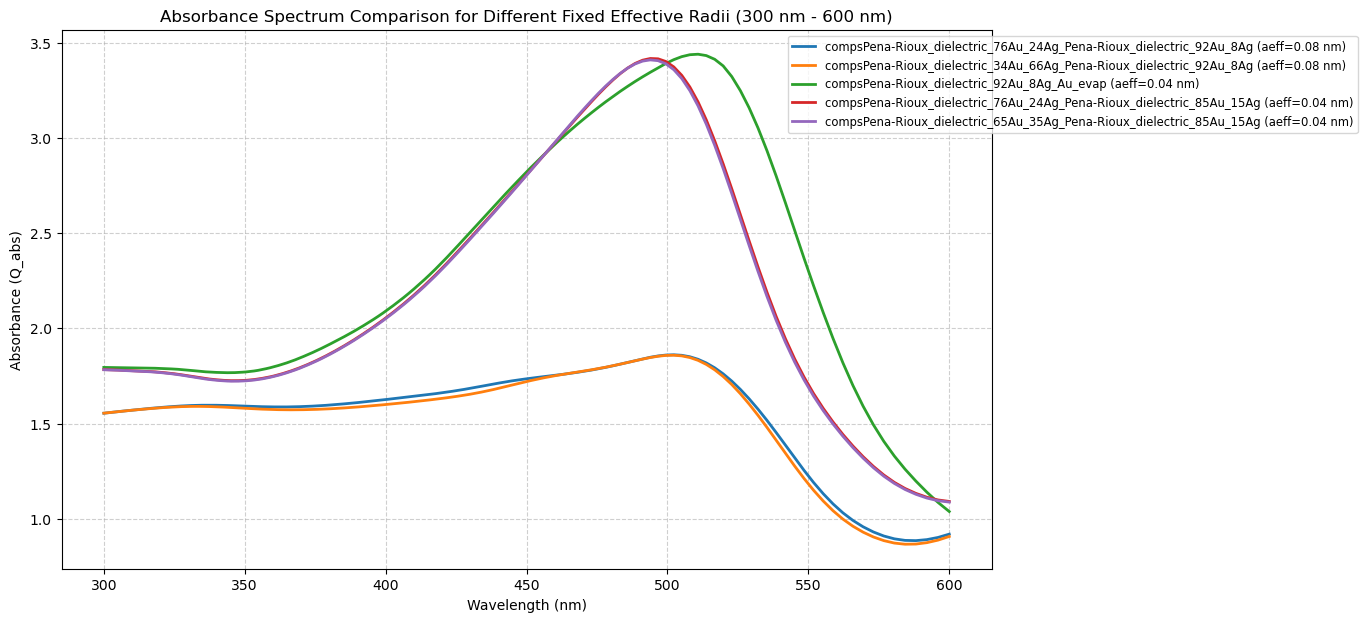

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random

# Define multiple parent folders
parent_folders = [
    "all_shells_80nmAeff/outer_40nm/boundaries36-40",
    "all_shells_40nmAeff/outer_40nm/boundaries36-40",
    "all_shells_40nmAeff_GKDLR/outer_40nm/boundaries36-40",
    "all_shells/outer_40nm/boundaries36-40",
]

# Define column names
columns = ["aeff", "wave", "Q_ext", "Q_abs", "Q_sca", "g(1)", "<cos^2>", "Q_bk", "Nsca"]

# Store valid plots
plot_data = []

# Store invalid files
invalid_files = {}

# Loop through all parent folders
for parent_folder in parent_folders:
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            qtable_path = os.path.join(subfolder_path, "qtable")

            # Check if qtable file exists
            if os.path.exists(qtable_path):
                # Read the file
                data = pd.read_csv(qtable_path, delim_whitespace=True, skiprows=16, names=columns)

                # Convert wave column to numeric, coerce errors to NaN
                data['wave'] = pd.to_numeric(data['wave'], errors='coerce')

                # Detect and log problematic files
                if data['wave'].isna().sum() > 0:
                    invalid_files[subfolder] = data.loc[data['wave'].isna(), 'wave'].tolist()
                    continue  # Skip this file

                # Filter data for wavelengths between 300 nm and 600 nm
                filtered_data = data[(data['wave'] >= 300e-3) & (data['wave'] <= 600e-3)]

                # Get the effective radius for labeling
                aeff = filtered_data["aeff"].iloc[0] if not filtered_data.empty else "Unknown"

                # Store plot data
                if not filtered_data.empty:
                    plot_data.append((filtered_data['wave'] * 1e3, filtered_data['Q_abs'], f"{subfolder} (aeff={aeff} nm)"))

# Select 5 random plots if available
random.seed(42)  # For reproducibility
selected_plots = random.sample(plot_data, min(5, len(plot_data)))

# Initialize plot
plt.figure(figsize=(12, 7))

# Plot selected data
for wave, Q_abs, label in selected_plots:
    plt.plot(wave, Q_abs, label=label, linewidth=2)

# Print invalid files if any
if invalid_files:
    print("\nFiles with non-numeric values in 'wave' column:")
    for file, values in invalid_files.items():
        print(f"{file}: {values[:5]} ...")  # Print first few invalid values for readability

# Customize plot
plt.title("Absorbance Spectrum Comparison for Different Fixed Effective Radii (300 nm - 600 nm)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (Q_abs)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize="small", loc="upper right", bbox_to_anchor=(1.4, 1))

# Show the plot
plt.show()
